In [1]:
import sys

sys.path.append("..")
# this is what you need for python script
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ParTIpy.arch import AA
from ParTIpy.generate_test_data import simulate
from ParTIpy.const import OPTIM_ALGS

N_SAMPLES = 20_000
N_ARCHETYPES = 8
N_DIMENSIONS = 20

X, A, Z = simulate(n_samples=N_SAMPLES, 
                   n_archetypes=N_ARCHETYPES, 
                   n_dimensions=N_DIMENSIONS, 
                   noise_std=0.0)

In [2]:
df_list = []
for optim_alg in OPTIM_ALGS:
    AA_object = AA(n_archetypes=N_ARCHETYPES, 
                   weight=None,
                   optim=optim_alg, 
                   init="random",
                   max_iter=100).fit(X)
    df_list.append(pd.DataFrame({
        "rss": AA_object.RSS_trace.copy(),
        "iteration": np.arange(len(AA_object.RSS_trace)),
        "algorithm": optim_alg
    }))
plot_df = pd.concat(df_list, axis=0)
plot_df

,rss,iteration,algorithm
0,4606.190264,0,regularized_nnls
1,2729.984463,1,regularized_nnls
2,1411.251511,2,regularized_nnls
3,587.248205,3,regularized_nnls
4,282.274195,4,regularized_nnls
...,...,...,...
95,2339.986876,95,frank_wolfe
96,2080.432959,96,frank_wolfe
97,1960.763305,97,frank_wolfe
98,2170.314413,98,frank_wolfe


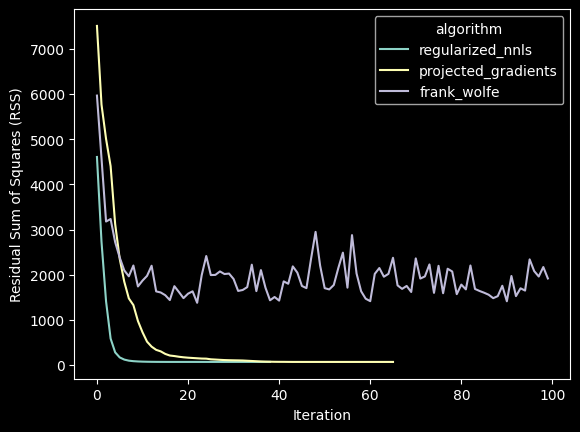

In [3]:
plt.style.use("dark_background")
sns.lineplot(data=plot_df, x="iteration", y="rss", hue="algorithm")
plt.xlabel("Iteration")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.show()